# Task: Sales Prediction using Python
- Create a sales data csv
- Columns in the data:
| Features |
|:---------|
|1.sale ID|
|2.sale date|
|3.customer|
|4.region|
|5. sale cost|
- Create 10 dummy entries with previous dates

- Predictive analysis in the upcoming month? (data processing)

- Last 3 months which month has good sales? (give percentage answer)

- Eg. dataset
    oct- 1 entry
    dec- 2 entries
    nov- 7 entries
- Give the sale percentage on different months




# 1. Create the dummy sales data :

In [4]:
import csv

#data to be written
data = [
    ['Sale ID', 'Sale Date', 'Customer', 'Region - Address', 'Region - City', 'Region - State', 'Region - Country', 'Region - Postal Code', 'Sale Cost'],
    [201, '2023-10-15', 'Deepak Rajan', '456 Anna Salai', 'Chennai', 'TN', 'India', '600002', 1100.00],
    [202, '2023-11-05', 'Priya Krishnan', '789 T Nagar', 'Chennai', 'TN', 'India', '600017', 1500.00],
    [203, '2023-11-10', 'Rajesh Kumar', '123 Velachery', 'Chennai', 'TN', 'India', '600042', 1300.00],
    [204, '2023-11-15', 'Meena Devi', '567 Mylapore', 'Chennai', 'TN', 'India', '600004', 1600.00],
    [205, '2023-11-20', 'Karthik Subramanian', '890 Adyar', 'Chennai', 'TN', 'India', '600020', 1800.00],
    [206, '2023-11-25', 'Anjali Raman', '234 Guindy', 'Chennai', 'TN', 'India', '600032', 1400.00],
    [207, '2023-11-30', 'Suresh Babu', '678 Kodambakkam', 'Chennai', 'TN', 'India', '600024', 1200.00],
    [208, '2023-12-10', 'Geetha Murthy', '901 Nungambakkam', 'Chennai', 'TN', 'India', '600034', 1000.00],
    [209, '2023-12-20', 'Prakash Singh', '345 Velan Nagar', 'Chennai', 'TN', 'India', '600045', 900.00],
    [210, '2023-12-30', 'Sangeeta Patel', '789 Kilpauk', 'Chennai', 'TN', 'India', '600010', 1200.00]
]

csv_file = 'sales_data.csv'


with open(csv_file, 'w', newline='') as csv_file_data:
    csv_writer = csv.writer(csv_file_data)
    csv_writer.writerows(data)

print(f'CSV file "{csv_file}" created successfully.')

CSV file "sales_data.csv" created successfully.


In [37]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

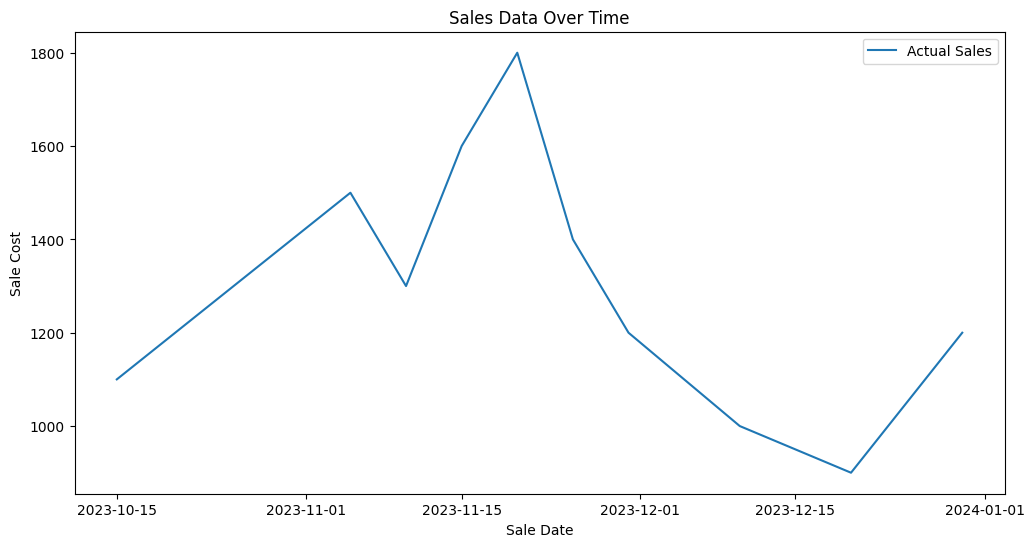

Forecasted Sales for the Next Month: 1200.0


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your sales data
data = pd.read_csv('sales_data.csv')
data['Sale Date'] = pd.to_datetime(data['Sale Date'])
data.set_index('Sale Date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Sale Cost'], label='Actual Sales')
plt.title('Sales Data Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Sale Cost')
plt.legend()
plt.show()


# Choose the appropriate order for SARIMA based on the decomposition
# You may need to adjust the order based on the decomposition plot
order = (1, 1, 1)  # Example order, replace with your values

# Fit the SARIMA model
model = SARIMAX(data['Sale Cost'], order=order, seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast only the next month
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)

# Create a date range for the forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Print numerical values
actual_value = data['Sale Cost'].iloc[-1]
forecasted_value = forecast.predicted_mean.iloc[0]

print(f"Forecasted Sales for the Next Month: {forecasted_value}")

In [26]:
# Calculate sales percentage for each month
monthly_sales = data.resample('M')['Sale Cost'].sum()
total_sales = monthly_sales.sum()

# Calculate the percentage
sales_percentage = (monthly_sales / total_sales) * 100

# Display sales percentage for each month
print("Sales Percentage for Different Months:")
print(sales_percentage)

# Identify the month with the highest sales in the last three months
last_three_months = monthly_sales.tail(3)
best_month = last_three_months.idxmax()
best_month_percentage = (last_three_months.loc[best_month] / total_sales) * 100

# Display the result for the last three months
print("\nLast Three Months Sales:")
print(last_three_months)
print(f"\nThe month with the highest sales in the last three months is {best_month.strftime('%B')} with a percentage of {best_month_percentage:.2f}%.")

Sales Percentage for Different Months:
Sale Date
2023-10-31     8.461538
2023-11-30    67.692308
2023-12-31    23.846154
Freq: M, Name: Sale Cost, dtype: float64

Last Three Months Sales:
Sale Date
2023-10-31    1100.0
2023-11-30    8800.0
2023-12-31    3100.0
Freq: M, Name: Sale Cost, dtype: float64

The month with the highest sales in the last three months is November with a percentage of 67.69%.
